<small><i>This notebook was inspired by [GitHub](https://github.com/jakevdp/sklearn_tutorial/).</i></small>

In [1]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
from matplotlib import pyplot as plt
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 7.34.0
numpy: 1.23.5
scipy: 1.11.3
matplotlib: 3.7.1
scikit-learn: 1.2.2


# About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

# Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

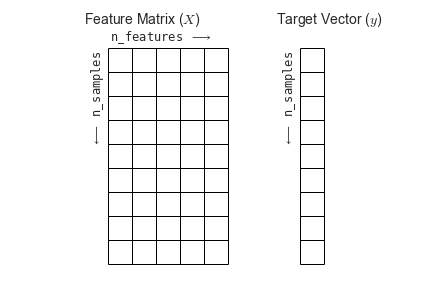

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

## Example: Iris Dataset

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

  ``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [28]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [29]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

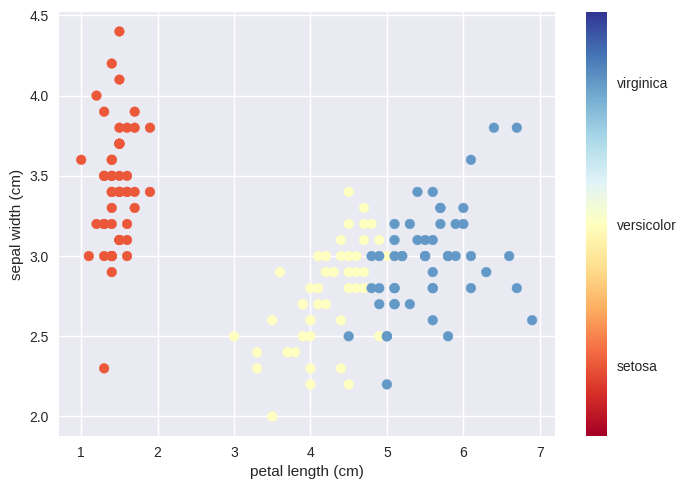

In [35]:
plt.style.use("seaborn-v0_8")

x_index = 2
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap='RdYlBu')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

# The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [2]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [3]:
model = LinearRegression()
print(model)

LinearRegression()


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [4]:
x = np.arange(10)
y = 2 * x + 1

In [5]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


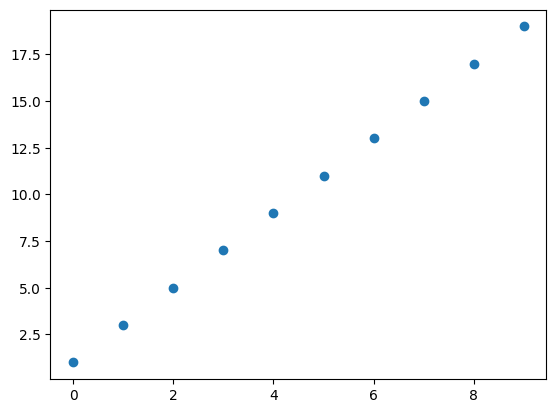

In [6]:
plt.plot(x, y, 'o');

In [7]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [8]:
# fit the model on our data
model.fit(X, y)

LinearRegression()

In [9]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999982


The model found a line with a slope 2 and intercept 1, as we'd expect.

# Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of
iris given a set of measurements of its flower.


Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

## Classification Example: SVM

here we'll go into brief detail one of the most powerful and interesting methods: **Support Vector Machines (SVMs)**. Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data. A discriminative classifier attempts to draw a line between the two sets of data.

Let's show a quick example of support vector classification.

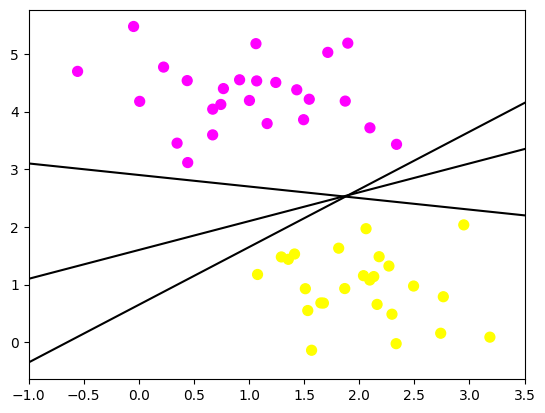

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

xfit = np.linspace(-1, 3.5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

#### Support Vector Machines: Maximizing the *Margin*

Support vector machines are one way to address this.
What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.  Here's an example of what it might look like:

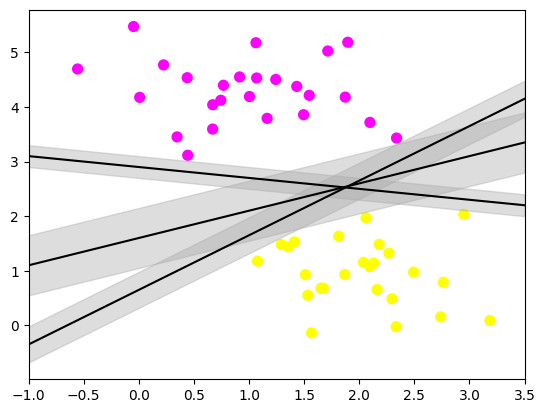

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Notice here that if we want to maximize this width, the middle fit is clearly the best.
This is the intuition of **support vector machines**, which optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

#### Fitting a Support Vector Machine

Now we'll fit a Support Vector Machine Classifier to these points and just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [15]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [16]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name).
In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

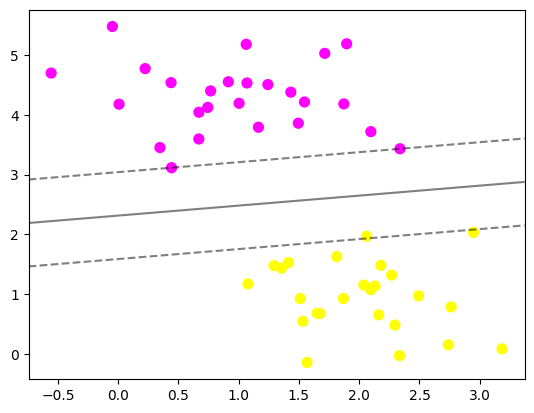

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

## Regression Example: Linear Regression

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms

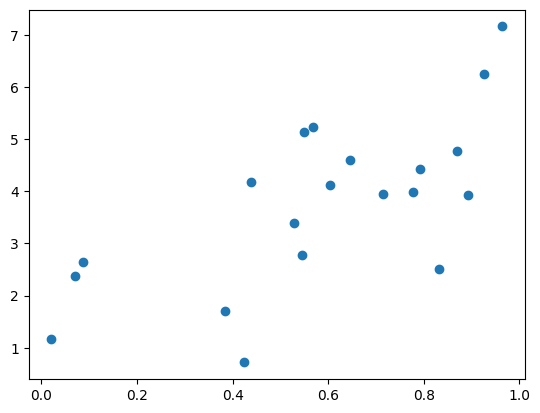

In [ ]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

As above, we can plot a line of best fit:

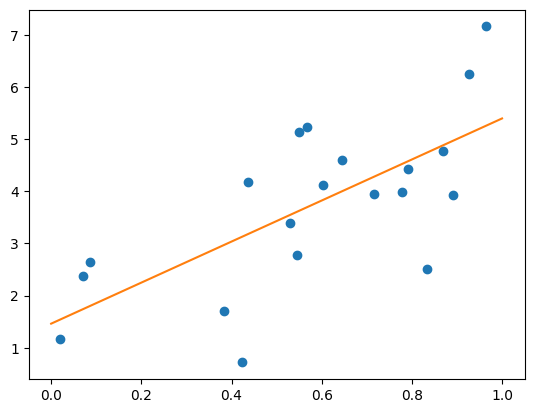

In [ ]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

# Unsupervised Learning: K-means clustering & KNN (k-nearest neighbors)

**Unsupervised learning** is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.

Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but no corresponding output data. The goal of unsupervised learning is **to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.**

## K-means Example:

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

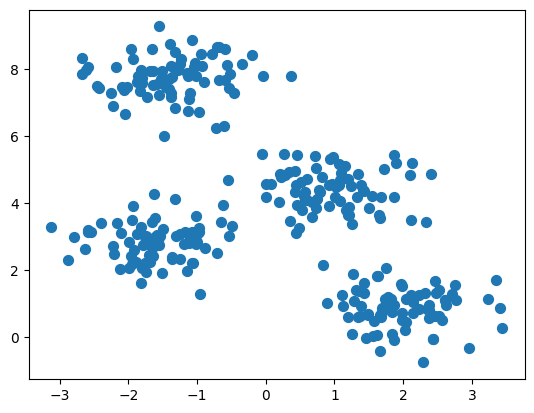

In [19]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

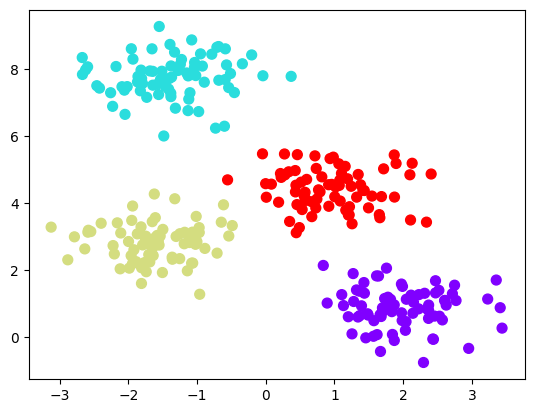

In [23]:
from sklearn.cluster import KMeans
est = KMeans(4, n_init=10)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

## KNN Example
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [10]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


You can also do probabilistic predictions:

In [11]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

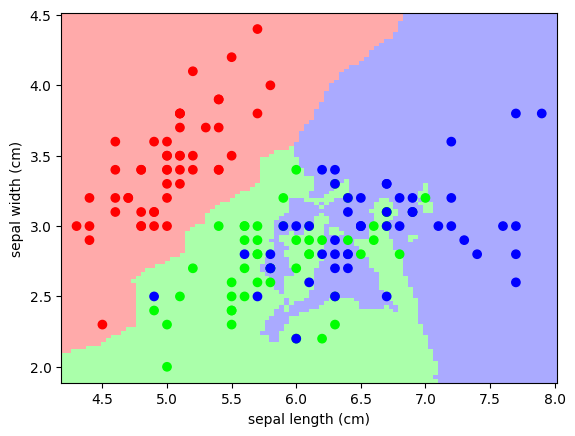

In [12]:
from fig_code import plot_iris_knn
plot_iris_knn()

# Model Validation

An important piece of machine learning is **model validation** : that is, determining how well your model will generalize from the training data to future unlabeled data. Let's look at an example using the *KNN classifier* with the iris dataset:

In [36]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

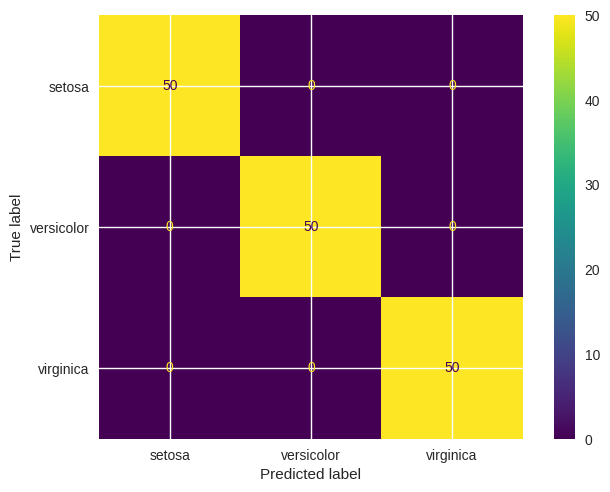

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion matrix before data splitting
cmx = confusion_matrix(y, y_pred, labels= [0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix = cmx,
                             display_labels = iris.target_names)
disp.plot()
plt.show()

For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a *training set* and a *testing set*. Scikit-learn contains some convenient routines to do this:

In [63]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print(Xtrain.shape)
print(Xtest.shape)

(120, 4)
(30, 4)


In [64]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

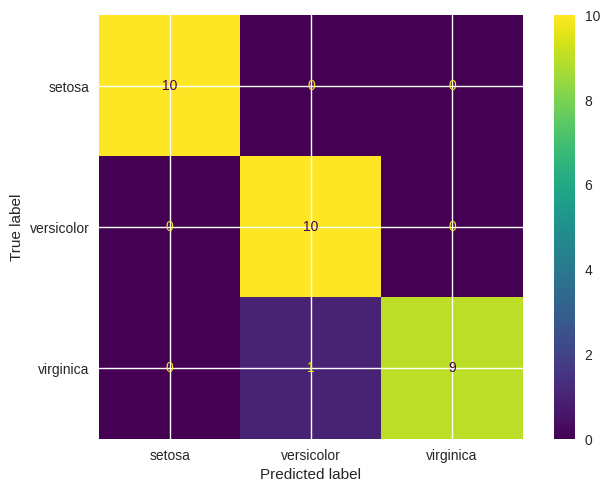

In [65]:
#confusion matrix after data splitting
cmx = confusion_matrix(ytest, ypred, labels= [0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix = cmx,
                             display_labels = iris.target_names)
disp.plot()
plt.show()

The metric we're using here, comparing the number of matches to the total number of samples, is known as the **accuracy score**, and can be computed using the following routine:

In [66]:
#Using KNeighborsClassifier 'score' method
mean_acc = clf.score(Xtest,ytest) # Mean accuracy of self.predict(X)
print(mean_acc*100)

96.66666666666667


This gives us a more reliable estimate of how our model is doing.

In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,clf.predict(Xtest))
print(acc*100)

96.66666666666667


Now we can see how changing input parameters of the model (knows as **hyperparameters**) can change the results:

In [71]:
for n_neighbors in [1, 3, 5]:
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(Xtrain, ytrain)
    print(n_neighbors, clf.score(Xtest, ytest))

1 0.9666666666666667
3 1.0
5 1.0


# Model Selection: GridSearchCV

The performance of a model significantly depends on the value of hyperparameters. **GridSearchCV** is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.

Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [72]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["precision", "recall"]

In [73]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.989 (+/-0.006) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.970 (+/-0.013) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.006) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.987 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.006) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.013) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.006) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.013) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.984 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.984 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.984 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o